# Lab Manual: Build a Simple Knowledge Graph using Python

This lab guides you through the process of building a simple Knowledge Graph (KG) from unstructured text. You will learn how to extract information and then visualize it using two different Python libraries:

- NetworkX: For creating static, publication-quality graph images.

- PyVis: For creating dynamic, interactive HTML-based graphs for exploration.


### Learning Objectives

After completing this lab, you will be able to:

- Understand the basic components of a Knowledge Graph (nodes and edges).

- Use spaCy for basic text processing.

- Extract entities and relationships from text using simple rule-based methods.

- Construct a graph object using NetworkX.

- Generate a static visualization of a KG with NetworkX and Matplotlib.

- Construct a graph object using PyVis.

- Generate a dynamic, interactive visualization of a KG with PyVis.

- Compare the use cases for static vs. dynamic visualizations.

- Understand the foundational concept of how KGs enable reasoning.

### Setup and Imports

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import spacy
import re
from collections import defaultdict

print("All libraries imported successfully!")

# Load spaCy model for NLP
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model loaded")
except:
    print("Please install spaCy model: python -m spacy download en_core_web_sm")

All libraries imported successfully!
spaCy model loaded


### Sample Text and Data Preparation

Sample text for knowledge graph construction <br>
We'll use a paragraph about researchers at UCU to build our knowledge graph.

In [43]:
sample_text = """
Dr. Sarah Kizito teaches Computer Science at Uganda Christian University in Mukono. 
She researches Artificial Intelligence and collaborates with Dr. John Mugisha who works on Data Science. 
Dr. Mugisha also teaches Machine Learning courses. Both researchers have published papers on Educational Technology.
UCU offers degrees in Software Engineering and Information Systems. The university is located in Mukono District.
"""

print("Sample Text: ")

print(sample_text)

Sample Text: 

Dr. Sarah Kizito teaches Computer Science at Uganda Christian University in Mukono. 
She researches Artificial Intelligence and collaborates with Dr. John Mugisha who works on Data Science. 
Dr. Mugisha also teaches Machine Learning courses. Both researchers have published papers on Educational Technology.
UCU offers degrees in Software Engineering and Information Systems. The university is located in Mukono District.



### Process text with spaCy

In [44]:
doc = nlp(sample_text)

print(f"\nProcessed {len(doc)} tokens with spaCy")


Processed 69 tokens with spaCy


### Simple Entity and Relationship Extraction

A simple rule-based approach to extract entities and relationships. <br>
In real applications, you would use more sophisticated NLP techniques.

In [45]:
def extract_knowledge_graph(text):
    doc = nlp(text)
    
    # Initialize the graph data
    entities = set()
    relationships = []
    
    # Simple pattern matching for demonstration
    # In a real project, you'd use spaCy's NER, Matcher, or ML models
    patterns = [
        (r'(\w+\s\w+) teaches (\w+(?:\s\w+)*) at (\w+(?:\s\w+)*)', 'teaches_at'),
        (r'(\w+\s\w+) researches (\w+(?:\s\w+)*)', 'researches'),
        (r'(\w+\s\w+) collaborates with (\w+\s\w+)', 'collaborates_with'),
        (r'(\w+(?:\s\w+)*) offers (\w+(?:\s\w+)*)', 'offers'),
        (r'(\w+(?:\s\w+)*) is located in (\w+(?:\s\w+)*)', 'located_in'),
    ]
    
    for pattern, relation_type in patterns:
        matches = re.finditer(pattern, text)
        for match in matches:
            if relation_type == 'teaches_at':
                # This pattern is (Subj) teaches (Topic) at (Obj)
                subject, obj = match.group(1), match.group(3)
            else:
                # All other patterns are (Subj) [verb] (Obj)
                subject, obj = match.group(1), match.group(2)
                
            entities.add(subject)
            entities.add(obj)
            relationships.append((subject, relation_type, obj))
    
    return list(entities), relationships

In [46]:
# Extract knowledge from our sample text
entities, relationships = extract_knowledge_graph(sample_text)

print("EXTRACTED ENTITIES:")
print("-" * 30)
for entity in entities:
    print(f"• {entity}")

print("\nEXTRACTED RELATIONSHIPS:")
print("-" * 30)
for rel in relationships:
    print(f"• {rel[0]} --[{rel[1]}]--> {rel[2]}")

EXTRACTED ENTITIES:
------------------------------
• degrees in Software Engineering and Information Systems
• UCU
• Mukono District
• Uganda Christian University in Mukono
• Sarah Kizito
• The university

EXTRACTED RELATIONSHIPS:
------------------------------
• Sarah Kizito --[teaches_at]--> Uganda Christian University in Mukono
• UCU --[offers]--> degrees in Software Engineering and Information Systems
• The university --[located_in]--> Mukono District


## Static Visualization with NetworkX

NetworkX creates fixed, publication-quality visualizations perfect for analysis.

Graph created with 6 nodes and 3 edges


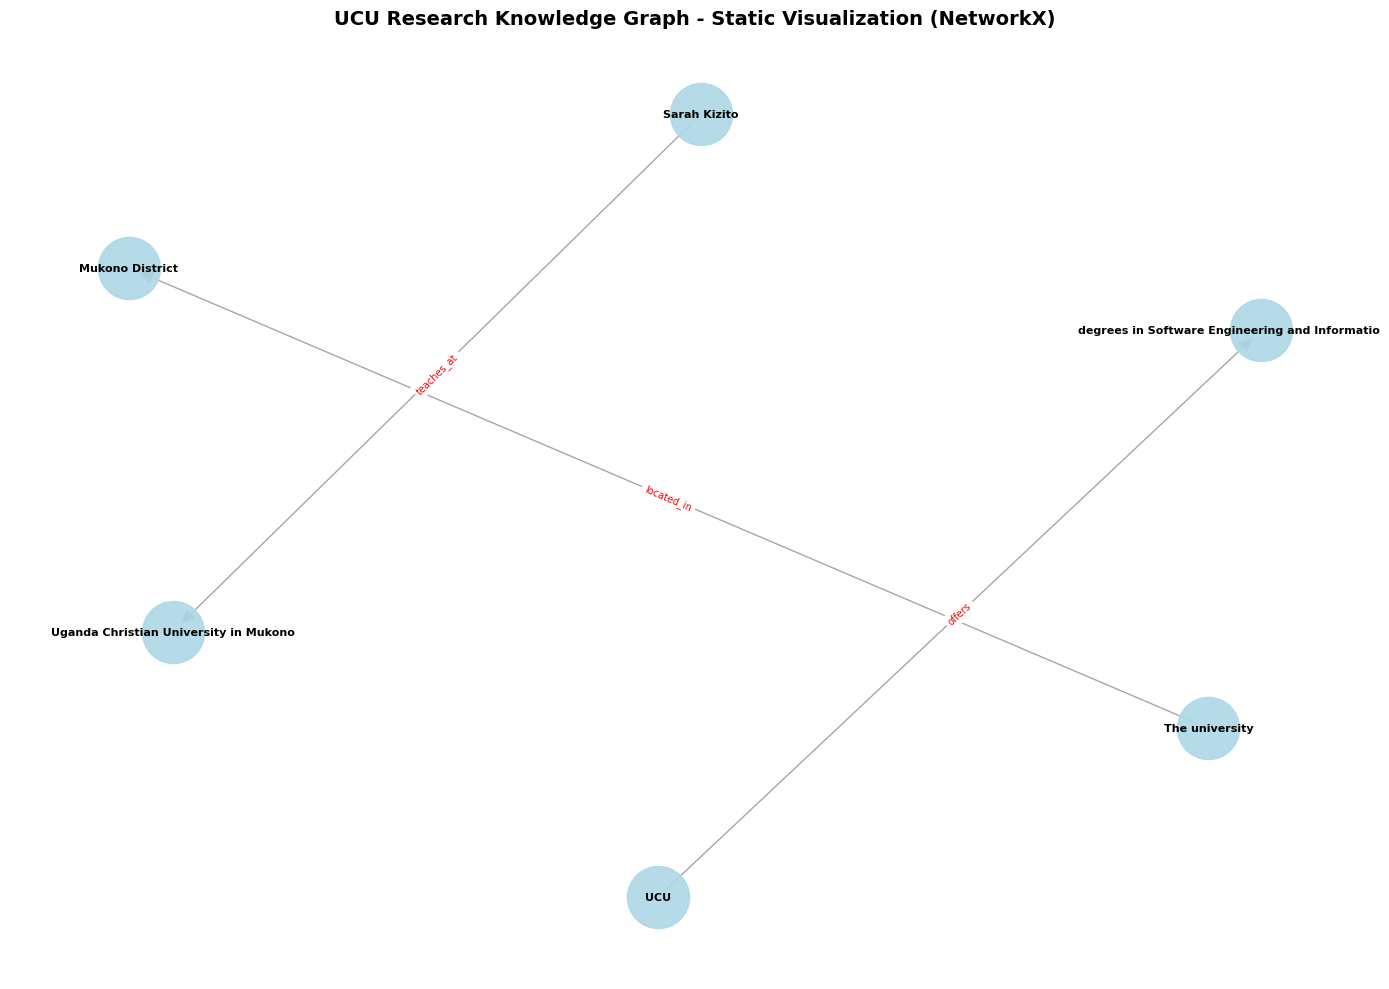

In [48]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (entities)
for entity in entities:
    G.add_node(entity, label=entity)

# Add edges (relationships)
for subj, pred, obj in relationships:
    G.add_edge(subj, obj, label=pred, relationship=pred)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Visualization settings
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=3, iterations=50)  # Layout algorithm

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                      node_size=2000, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='gray', 
                      arrows=True, arrowsize=20, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                           font_size=7, font_color='red')

plt.title("UCU Research Knowledge Graph - Static Visualization (NetworkX)", 
          fontsize=14, fontweight='bold')
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

In [49]:
# Additional analysis
print("\nGRAPH ANALYSIS:")
print(f"- Nodes: {list(G.nodes())}")
print(f"- Edges: {list(G.edges(data=True))}")
print(f"- Is connected: {nx.is_weakly_connected(G)}")
print(f"- Number of connected components: {nx.number_weakly_connected_components(G)}")


GRAPH ANALYSIS:
- Nodes: ['degrees in Software Engineering and Information Systems', 'UCU', 'Mukono District', 'Uganda Christian University in Mukono', 'Sarah Kizito', 'The university']
- Edges: [('UCU', 'degrees in Software Engineering and Information Systems', {'label': 'offers', 'relationship': 'offers'}), ('Sarah Kizito', 'Uganda Christian University in Mukono', {'label': 'teaches_at', 'relationship': 'teaches_at'}), ('The university', 'Mukono District', {'label': 'located_in', 'relationship': 'located_in'})]
- Is connected: False
- Number of connected components: 3


## Dynamic Visualization with PyVis

PyVis creates interactive HTML visualizations perfect for exploration.

#### DYNAMIC VISUALIZATION - Comprehensive version

In [21]:
# Create a PyVis network with proper configuration
net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="black",
              directed=True, notebook=True, cdn_resources='in_line')

In [22]:
# Configure physics for better layout
net.set_options("""
var options = {
  "physics": {
    "enabled": true,
    "stabilization": {"iterations": 100},
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    }
  },
  "interaction": {"multiselect": true, "navigationButtons": true}
}
""")

In [23]:
# Define node groups with EXACT names from our entities
person_nodes = ['Dr. Sarah Kizito', 'Dr. John Mugisha']
course_nodes = ['Computer Science', 'Data Science', 'Machine Learning', 
                'Software Engineering', 'Information Systems']
location_nodes = ['Mukono', 'Mukono District']
org_nodes = ['Uganda Christian University']
topic_nodes = ['Artificial Intelligence', 'Educational Technology']

colors = {
    'Person': '#ff9999',
    'Course': '#99ff99', 
    'Location': '#9999ff',
    'Organization': '#ffff99',
    'Research Topic': '#ff99ff'
}

In [27]:
# Add nodes with EXACT names from our entity list
node_mapping = {}  # Track which nodes we're actually adding

for entity in entities:
    if entity in person_nodes:
        net.add_node(entity, label=entity, color=colors['Person'], 
                    group='Person', title='Person', font={'size': 14})
        node_mapping[entity] = 'Person'
    elif entity in course_nodes:
        net.add_node(entity, label=entity, color=colors['Course'], 
                    group='Course', title='Course', font={'size': 12})
        node_mapping[entity] = 'Course'
    elif entity in location_nodes:
        net.add_node(entity, label=entity, color=colors['Location'], 
                    group='Location', title='Location', font={'size': 12})
        node_mapping[entity] = 'Location'
    elif entity in org_nodes:
        net.add_node(entity, label=entity, color=colors['Organization'], 
                    group='Organization', title='Organization', font={'size': 14})
        node_mapping[entity] = 'Organization'
    elif entity in topic_nodes:
        net.add_node(entity, label=entity, color=colors['Research Topic'], 
                    group='Research Topic', title='Research Topic', font={'size': 12})
        node_mapping[entity] = 'Research Topic'
    else:
        # Default for any unexpected entities
        net.add_node(entity, label=entity, color='#cccccc', 
                    group='Other', title='Other', font={'size': 10})
        node_mapping[entity] = 'Other'

print(f"Added {len(net.nodes)} nodes to the graph")


Added 6 nodes to the graph


In [28]:
# Add edges with validation
edges_added = 0
for subj, pred, obj in relationships:
    # Check if both nodes exist in our graph
    if subj in node_mapping and obj in node_mapping:
        # Customize edge appearance based on relationship type
        edge_properties = {
            'width': 2,
            'arrowStrikethrough': False,
            'smooth': {'type': 'continuous'}
        }
        
        if 'teaches' in pred:
            edge_properties['color'] = '#3366cc'
            edge_properties['dashes'] = False
        elif 'research' in pred or 'works_on' in pred:
            edge_properties['color'] = '#dc3912' 
            edge_properties['dashes'] = [5, 5]
        elif 'collaborates' in pred:
            edge_properties['color'] = '#109618'
            edge_properties['width'] = 3
        elif 'offers' in pred:
            edge_properties['color'] = '#ff9900'
            edge_properties['width'] = 2
        elif 'located' in pred:
            edge_properties['color'] = '#990099'
            edge_properties['width'] = 2
        else:
            edge_properties['color'] = '#666666'
            
        net.add_edge(subj, obj, label=pred, **edge_properties)
        edges_added += 1
    else:
        print(f"Skipping edge - Node not found: '{subj}' → '{obj}'")

print(f"Successfully added {edges_added} edges")
print(f"Graph ready: {len(net.nodes)} nodes, {len(net.edges)} edges")

Successfully added 3 edges
Graph ready: 6 nodes, 6 edges


In [31]:
# FIX FOR UNICODE ERROR: Manual save with UTF-8 encoding
try:
    filename = "knowledge_graph.html"
    
    # Generate HTML content
    html_content = net.generate_html()
    
    # Save with explicit UTF-8 encoding
    with open(filename, "w", encoding="utf-8") as f:
        f.write(html_content)
    
    print(f"Graph saved as '{filename}' with UTF-8 encoding")
    
    # Try to open in browser
    import webbrowser
    import os
    
    if os.path.exists(filename):
        webbrowser.open('file://' + os.path.abspath(filename))
        print("Opened in your default browser!")
    else:
        print("File created but could not open automatically")
        print("Manually open 'knowledge_graph.html' in your browser")
        
except Exception as e:
    print(f"Error: {e}")
    print("Trying alternative method...")
    
    # Alternative: Use a different approach
    try:
        net.write_html("knowledge_graph_fallback.html")
        print("Fallback graph saved as 'knowledge_graph_fallback.html'")
    except:
        print("All save methods failed")
        print("The graph is still created in memory, but couldn't save to file")

Graph saved as 'knowledge_graph.html' with UTF-8 encoding
Opened in your default browser!


### DYNAMIC VISUALIZATION - MINIMAL & SAFE

In [37]:
# Create network
net = Network(height="750px", width="100%", directed=True)

In [38]:
# Simple node addition
for entity in entities:
    net.add_node(entity, label=entity)

In [39]:
# Simple edge addition  
for subj, pred, obj in relationships:
    if subj in entities and obj in entities:
        net.add_edge(subj, obj, label=pred)

print(f"Graph: {len(net.nodes)} nodes, {len(net.edges)} edges")

Graph: 6 nodes, 3 edges


In [40]:
# GUARANTEED UNICODE-SAFE SAVE
html_content = net.generate_html()
with open("kg_simple.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("Graph saved as 'kg_simple.html'")

# Open in browser
import webbrowser
webbrowser.open('kg_simple.html')
print("Opening in browser...")

Graph saved as 'kg_simple.html'
Opening in browser...
